In [3]:
import keras
import keras.backend as K
import numpy as np
from keras.utils import generic_utils
from keras.optimizers import Adam, SGD
from PIL import Image
from models import discriminator, generator, GAN
from facade_dataset import load_dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_img, train_label = load_dataset(data_range=(1,300))
train_label = train_label[:,:,:,np.newaxis]
test_img, test_label = load_dataset(data_range=(300,379))
test_label = test_label[:,:,:,np.newaxis]

load dataset start
     from: ./dataset/base/
load dataset done
load dataset start
     from: ./dataset/base/
load dataset done


In [20]:
train_label.shape

(299, 256, 256, 1)

In [13]:
def l1_loss(y_true,y_pred):
    return K.mean(K.abs(y_pred - y_true))

In [14]:
patch_size = 64
batch_size = 50
nb_epoch = 1

In [15]:
# Create optimizers
opt_gan = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# opt_discriminator = SGD(lr=1E-3, momentum=0.9, nesterov=True)
opt_discriminator = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [16]:
gan_loss = [l1_loss, 'binary_crossentropy']
gan_loss_weights = [10,1]

gen = generator()
dis = discriminator(patch_size)
dis.trainable = False

gan = GAN(gen,dis)
gan.compile(loss = gan_loss, loss_weights = gan_loss_weights,optimizer = opt_gan)

dis.trainable = True
dis.compile(loss='binary_crossentropy', optimizer=opt_discriminator)            

In [58]:
nb_train = 299
for epoch in range(nb_epoch):
    print("Epoch is ", epoch)
    print("Number of batches", int(nb_train/batch_size))
    ind = np.random.permutation(nb_train)
    for index in range(int(nb_train/batch_size)):
        print(index)
        img_batch = train_img[ind[(index*batch_size) : ((index+1)*batch_size)],:,:,:]
        label_batch =train_label[ind[(index*batch_size) : ((index+1)*batch_size)],:,:,:]
        generated_img = gen.predict(label_batch)
        labels = np.concatenate([label_batch,label_batch])
        imgs = np.concatenate([img_batch,generated_img])
        dis_y = np.array([1] * batch_size + [0] * batch_size)
        d_loss = np.array(dis.train_on_batch([labels,imgs],dis_y ))
        gan_y = np.array([1] * batch_size)
        g_loss = gan.train_on_batch([label_batch, img_batch], [img_batch, gan_y])
        

Epoch is  0
Number of batches 5
0
(50, 256, 256, 3)
1
(50, 256, 256, 3)


KeyboardInterrupt: 

In [ ]:
label_batch =train_label[0: 10,:,:,:]
labels = np.concatenate([label_batch,label_batch])

## test

In [56]:
label_batch =train_label[0: 10,:,:,:]
img_batch = train_img[0:10,:,:,:]

train_y = np.array([1] * 10)
gan.train_on_batch([label_batch,img_batch],[img_batch,train_y])

[8.7451668, 0.78720349, 0.87313193]

In [36]:
w0 = np.copy(dis.layers[-1].get_weights()[0])
gan.train_on_batch([train_label,train_img], [train_img,train_y])
w1 = np.copy(dis.layers[-1].get_weights()[0])
dis.train_on_batch([train_label,train_img],train_y)
w2 = np.copy(dis.layers[-1].get_weights()[0])

In [37]:
print(np.array_equal(w0,w1))
print(np.array_equal(w1,w2))

True
False


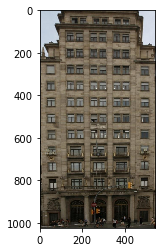

In [30]:
img = Image.open("./dataset/base" + "/cmp_b0001.jpg","r")
plt.imshow(img)

In [29]:
rgb_im = img.convert("BGR")
plt.imshow(rgb_im)

ValueError: conversion from RGB to BGR not supported

In [27]:
rgb_im = np.asarray(rgb_im).astype("f")

In [31]:
rgb_im = rgb_im/128.0 - 1.0

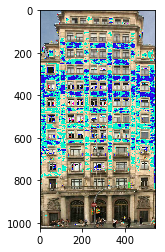

In [32]:
plt.imshow(rgb_im)

In [33]:
rgb_img = Image.open( "./dataset/base" + "/cmp_b0001.jpg","r" )
r, g, b = img.split()
bgr_img = Image.merge("RGB", (b, g, r)) 

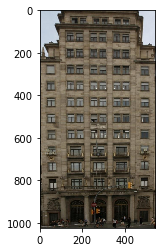

In [34]:
plt.imshow(rgb_img)

In [50]:
rgb_array = np.asarray(rgb_img).astype("f")

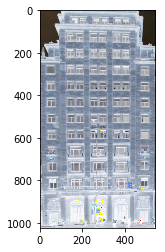

In [51]:
plt.imshow(rgb_array)

In [52]:
Image.fromarray(rgb_array.astype(np.uint8)).save("./f_array.png")

In [55]:
norm_array = rgb_array/128.0 -1.0
norm_array = norm_array * 128.0 + 128.0

In [56]:
Image.fromarray(norm_array.astype(np.uint8)).save("./norm_array.png")